In [63]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt 

In [64]:
#Defining the url for the dataset
urlds="https://gitlab.gitlab.svc.cent-su.org/ccaicedo/652public/-/raw/master/fall21/NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data__Beginning_2017.csv"
#Access to datasets via URLs is usually easy (see command below) but we have to work around a security issue in our case.

csvdata=requests.get(urlds,verify=False).text  #this will generate a warning but you can proceed

/opt/conda/lib/python3.9/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gitlab.gitlab.svc.cent-su.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [65]:
data=pd.read_csv(StringIO(csvdata))  #getting the data into a pandas dataframe

In [66]:
data.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,07/09/2021,10/08/2020,Tesla,Model 3,NaN,10549,BEV,Purchase,2.99,592.89,2000.0
1,07/09/2021,10/09/2020,Nissan,LEAF,NaN,14623,BEV,Lease,2.91,592.89,2000.0
2,07/09/2021,10/14/2020,Tesla,Model X,NaN,10956,BEV,Purchase,2.52,592.89,500.0
3,07/09/2021,10/21/2020,Tesla,Model X,NaN,11747,BEV,Lease,2.52,592.89,500.0
4,07/09/2021,10/21/2020,Tesla,Model Y,NaN,10014,BEV,Purchase,3.07,592.89,2000.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43422 entries, 0 to 43421
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Data through Date                          43422 non-null  object 
 1   Submitted Date                             43422 non-null  object 
 2   Make                                       43422 non-null  object 
 3   Model                                      43422 non-null  object 
 4   County                                     43394 non-null  object 
 5   ZIP                                        43422 non-null  int64  
 6   EV Type                                    43422 non-null  object 
 7   Transaction Type                           43421 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  43422 non-null  float64
 9   Annual Petroleum Reductions (gallons)      43422 non-null  float64
 10  Rebate Amount (USD)   

In [68]:
data = data.drop("Data through Date", axis=1)
data.head()

,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,10/08/2020,Tesla,Model 3,NaN,10549,BEV,Purchase,2.99,592.89,2000.0
1,10/09/2020,Nissan,LEAF,NaN,14623,BEV,Lease,2.91,592.89,2000.0
2,10/14/2020,Tesla,Model X,NaN,10956,BEV,Purchase,2.52,592.89,500.0
3,10/21/2020,Tesla,Model X,NaN,11747,BEV,Lease,2.52,592.89,500.0
4,10/21/2020,Tesla,Model Y,NaN,10014,BEV,Purchase,3.07,592.89,2000.0


In [69]:
data["Submitted Date"] = pd.to_datetime(data["Submitted Date"])
data.head()

,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,2020-10-08,Tesla,Model 3,NaN,10549,BEV,Purchase,2.99,592.89,2000.0
1,2020-10-09,Nissan,LEAF,NaN,14623,BEV,Lease,2.91,592.89,2000.0
2,2020-10-14,Tesla,Model X,NaN,10956,BEV,Purchase,2.52,592.89,500.0
3,2020-10-21,Tesla,Model X,NaN,11747,BEV,Lease,2.52,592.89,500.0
4,2020-10-21,Tesla,Model Y,NaN,10014,BEV,Purchase,3.07,592.89,2000.0


In [70]:
data.rename(columns={
    "Submitted Date":"submit_date",
    "Make":"make",
    "Model":"model",
    "County":"county",
    "ZIP":"zip",
    "EV Type":"ev_type",
    "Transaction Type":"transaction_type",
    "Annual GHG Emissions Reductions (MT CO2e)":"ghg_redux_mtco2e_annual",
    "Annual Petroleum Reductions (gallons)":"petroleum_redux_gallons_annual",
    "Rebate Amount (USD)":"rebate_amt_usd"
}, inplace = True)
data.head()

,submit_date,make,model,county,zip,ev_type,transaction_type,ghg_redux_mtco2e_annual,petroleum_redux_gallons_annual,rebate_amt_usd
0,2020-10-08,Tesla,Model 3,NaN,10549,BEV,Purchase,2.99,592.89,2000.0
1,2020-10-09,Nissan,LEAF,NaN,14623,BEV,Lease,2.91,592.89,2000.0
2,2020-10-14,Tesla,Model X,NaN,10956,BEV,Purchase,2.52,592.89,500.0
3,2020-10-21,Tesla,Model X,NaN,11747,BEV,Lease,2.52,592.89,500.0
4,2020-10-21,Tesla,Model Y,NaN,10014,BEV,Purchase,3.07,592.89,2000.0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43422 entries, 0 to 43421
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   submit_date                     43422 non-null  datetime64[ns]
 1   make                            43422 non-null  object        
 2   model                           43422 non-null  object        
 3   county                          43394 non-null  object        
 4   zip                             43422 non-null  int64         
 5   ev_type                         43422 non-null  object        
 6   transaction_type                43421 non-null  object        
 7   ghg_redux_mtco2e_annual         43422 non-null  float64       
 8   petroleum_redux_gallons_annual  43422 non-null  float64       
 9   rebate_amt_usd                  43264 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 3.

In [72]:
ev_data = data.set_index("submit_date")
ev_data.head()

,make,model,county,zip,ev_type,transaction_type,ghg_redux_mtco2e_annual,petroleum_redux_gallons_annual,rebate_amt_usd
submit_date,,,,,,,,,
2020-10-08,Tesla,Model 3,NaN,10549,BEV,Purchase,2.99,592.89,2000.0
2020-10-09,Nissan,LEAF,NaN,14623,BEV,Lease,2.91,592.89,2000.0
2020-10-14,Tesla,Model X,NaN,10956,BEV,Purchase,2.52,592.89,500.0
2020-10-21,Tesla,Model X,NaN,11747,BEV,Lease,2.52,592.89,500.0
2020-10-21,Tesla,Model Y,NaN,10014,BEV,Purchase,3.07,592.89,2000.0


In [73]:
ev_data.dropna(inplace=True)

In [74]:
monthly_rebate_sum = ev_data.rebate_amt_usd.resample("M").sum()
monthly_rebate_sum.sort_index(inplace=True)
monthly_rebate_sum.head()

submit_date
2017-03-31     41100.0
2017-04-30    448600.0
2017-05-31    521700.0
2017-06-30    571700.0
2017-07-31    513600.0
Freq: M, Name: rebate_amt_usd, dtype: float64

<AxesSubplot:xlabel='submit_date'>

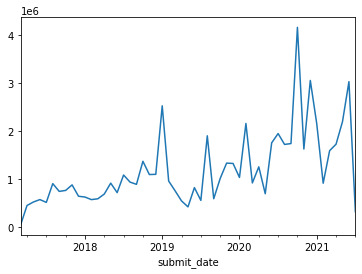

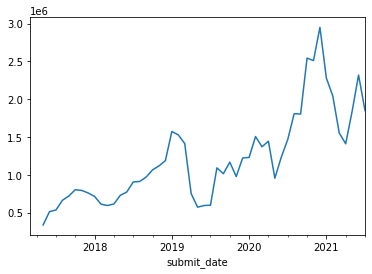

In [75]:
plt.figure()
monthly_rebate_sum.plot()
plt.figure()
monthly_rebate_sum.rolling(3).mean().plot()

In [76]:
#%pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import re

In [77]:
data.head()

,submit_date,make,model,county,zip,ev_type,transaction_type,ghg_redux_mtco2e_annual,petroleum_redux_gallons_annual,rebate_amt_usd
0,2020-10-08,Tesla,Model 3,NaN,10549,BEV,Purchase,2.99,592.89,2000.0
1,2020-10-09,Nissan,LEAF,NaN,14623,BEV,Lease,2.91,592.89,2000.0
2,2020-10-14,Tesla,Model X,NaN,10956,BEV,Purchase,2.52,592.89,500.0
3,2020-10-21,Tesla,Model X,NaN,11747,BEV,Lease,2.52,592.89,500.0
4,2020-10-21,Tesla,Model Y,NaN,10014,BEV,Purchase,3.07,592.89,2000.0


In [78]:
assoc_rules = data.dropna()
assoc_rules.head()

,submit_date,make,model,county,zip,ev_type,transaction_type,ghg_redux_mtco2e_annual,petroleum_redux_gallons_annual,rebate_amt_usd
29,2017-03-30,Toyota,Prius Prime,Albany,12211,PHEV,Purchase,3.03,440.11,1100.0
30,2017-04-03,Kia,Soul EV,Albany,12205,BEV,Lease,2.76,592.89,1700.0
31,2017-04-08,Toyota,Prius Prime,Albany,12110,PHEV,Purchase,3.03,440.11,1100.0
32,2017-04-10,Chevrolet,Volt,Albany,12203,PHEV,Purchase,2.70,525.03,1700.0
33,2017-04-10,Chevrolet,Volt,Albany,12208,PHEV,Purchase,2.70,525.03,1700.0


In [79]:
assoc_rules.model.unique()

array(['Prius Prime', 'Soul EV', 'Volt', 'Focus', 'i3 REx', 'Bolt',
       'Fusion Energi', 'Model X', 'X5', 'C-MAX Energi', 'LEAF',
       'Optima Plug-in', 'Pacifica', 'Cooper', 'Model S', 'Clarity',
       'Outlander', 'e-Golf', 'Niro', 'Model 3', 'Kona Electric',
       'Crosstrek PHEV', 'Ionic Plug-In Hybrid', 'e-tron', 'i3',
       'Ionic_Electric', 'Sonata Plug-in', 'Model Y', 'RAV4 Prime',
       'X3 xDrive30e', '530e', 'Mustang Mach-E', 'ID.4', 'Wrangler',
       '330e', 'A7', 'Electric Fortwo Coupe', 'I-PACE', 'S90 T8',
       'XC60 T8', 'Cayenne S E-Hybrid', 'GLC350e', 'XC90 T8', 'Q5',
       'Polestar 2', 'XC40', 'Panamera 4 E-Hybrid', 'Taycan', 'S60',
       'Range Rover', 'Aviator', '740e', 'Electric Fortwo Cabriolet',
       'GLE 550e', 'i8', 'A8', '745e', 'B250e', 'C350e',
       'Cayenne E-Hybrid'], dtype=object)

In [90]:
assoc_rules["rebate_str"] = assoc_rules.rebate_amt_usd.astype("int").astype("str")

/tmp/ipykernel_185/3440492988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assoc_rules["rebate_str"] = assoc_rules.rebate_amt_usd.astype("int").astype("str")


In [91]:
assoc_rules.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43235 entries, 29 to 43421
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   submit_date                     43235 non-null  datetime64[ns]
 1   make                            43235 non-null  object        
 2   model                           43235 non-null  object        
 3   county                          43235 non-null  object        
 4   zip                             43235 non-null  int64         
 5   ev_type                         43235 non-null  object        
 6   transaction_type                43235 non-null  object        
 7   ghg_redux_mtco2e_annual         43235 non-null  float64       
 8   petroleum_redux_gallons_annual  43235 non-null  float64       
 9   rebate_amt_usd                  43235 non-null  float64       
 10  rebate_str                      43235 non-null  object        
dtypes

In [92]:
assoc_rules.head()

,submit_date,make,model,county,zip,ev_type,transaction_type,ghg_redux_mtco2e_annual,petroleum_redux_gallons_annual,rebate_amt_usd,rebate_str
29,2017-03-30,Toyota,Prius Prime,Albany,12211,PHEV,Purchase,3.03,440.11,1100.0,1100
30,2017-04-03,Kia,Soul EV,Albany,12205,BEV,Lease,2.76,592.89,1700.0,1700
31,2017-04-08,Toyota,Prius Prime,Albany,12110,PHEV,Purchase,3.03,440.11,1100.0,1100
32,2017-04-10,Chevrolet,Volt,Albany,12203,PHEV,Purchase,2.70,525.03,1700.0,1700
33,2017-04-10,Chevrolet,Volt,Albany,12208,PHEV,Purchase,2.70,525.03,1700.0,1700


In [104]:
basket = pd.DataFrame(data = {
    "make":assoc_rules.make,
    "model":assoc_rules.model,
    "county":assoc_rules.county,
    "zip":assoc_rules.zip,
    "ev_type":assoc_rules.ev_type,
    "transaction_type":assoc_rules.transaction_type,
    "rebate":assoc_rules.rebate_str
})

In [107]:
basket = basket.reset_index().drop("index", axis=1)
basket.head()

,make,model,county,zip,ev_type,transaction_type,rebate
0,Toyota,Prius Prime,Albany,12211,PHEV,Purchase,1100
1,Kia,Soul EV,Albany,12205,BEV,Lease,1700
2,Toyota,Prius Prime,Albany,12110,PHEV,Purchase,1100
3,Chevrolet,Volt,Albany,12203,PHEV,Purchase,1700
4,Chevrolet,Volt,Albany,12208,PHEV,Purchase,1700


In [108]:
frequent_itemsets = apriori(basket, min_support=0.07, use_colnames=True)

ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value Toyota

## Note on Association Rule Mining

I had forgotten that everything has to be 1-hot encoded, so I am unsure if it will work anymore. Will have to move past it for now...